In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
source('paths.sh')


In [4]:
trait_list_f %>%
fread() %>%
rename_with(
    function(x){str_replace(x, '#', '')}, starts_with("#")
) -> trait_list_df


In [40]:
fread(
    cmd = paste(
        sprintf(
            'find %s -name "*snpnetBETAs.tsv" -type f -print0',
            file.path(PRS202110_d, 'per_trait')
        ),
        'sort',
        'wc -l --files0-from=-',
        'tr " "  "\t"',
        sprintf('sed -e "s+%s++g"', file.path(PRS202110_d, 'per_trait')),
        sep=' | '
    ),
    head = F,
    col.names = c('wc_l', 'beta_f')
) %>%
filter(beta_f != 'total') %>%
mutate(
    GBE_ID = str_replace(str_replace(beta_f, '^/', ''), '.snpnetBETAs.tsv$', ''),
    n_variables = wc_l - 1
) %>%
select(GBE_ID, n_variables) -> n_variables_df


In [47]:
trait_list_df %>%
pull(trait) %>%
lapply(function(t){
    file.path(PRS202110_d, 'per_trait', sprintf('%s.eval.tsv.gz', t)) %>%
    fread()
}) %>%
bind_rows %>%
rename_with(
    function(x){str_replace(x, '#', '')}, starts_with("#")
) -> eval_df


In [48]:
trait_list_df %>%
pull(trait) %>%
lapply(function(t){
    file.path(PRS202110_d, 'per_trait', sprintf('%s.PRS_pval.tsv.gz', t)) %>%
    fread() %>%
    filter(variable != '(Intercept)')
}) %>%
bind_rows %>%
rename_with(
    function(x){str_replace(x, '#', '')}, starts_with("#")
) -> PRS_pval_df


Warning message:
“Removed 2 rows containing missing values (geom_point).”


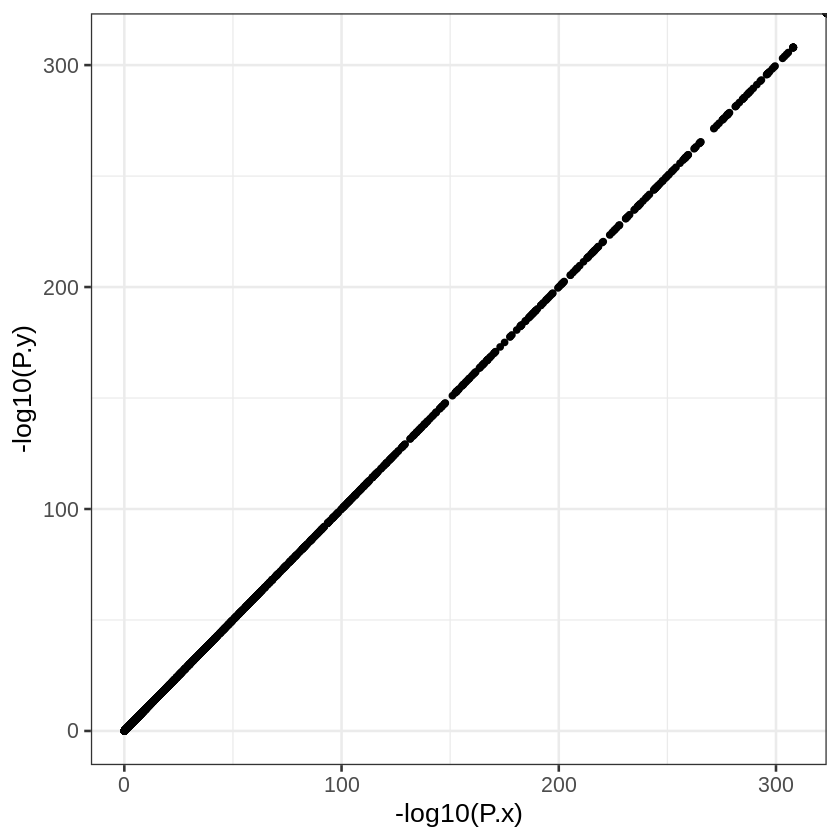

In [60]:
eval_df %>%
filter(
    metric %in% c('auc', 'r2'),
    str_detect(predictors, 'PRS_')
) %>%
left_join(
    PRS_pval_df,
    by = c("predictors"="variable", "split" = "split")
) %>% 
ggplot(aes(x = -log10(P.x), y = -log10(P.y))) +
geom_point() +
theme_bw(base_size=16)


In [73]:
PRS_pval_df %>%
filter(split == 'test') %>%
filter(P < (0.05/1565)) %>%
arrange(-z_or_t_value) %>%
head(100)

split,variable,estimate,SE,z_or_t_value,P
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
test,PRS_INI30790,46.5282693,0.191580428,242.86546,0
test,PRS_INI30100,1.0593494,0.005510511,192.24158,0
test,PRS_INI30840,11.6616444,0.068846765,169.38551,0
test,PRS_INI30080,1.0574528,0.008008792,132.03648,0
test,PRS_INI30110,1.0564973,0.008116110,130.17286,0
test,PRS_INI50,1.0066502,0.008351234,120.53909,0
test,PRS_INI30660,2.2363430,0.018752649,119.25478,0
test,PRS_INI30040,1.1073390,0.009383447,118.00984,0
test,PRS_INI30050,1.1273363,0.009712515,116.07048,0


In [54]:
eval_df %>%
filter(
    metric %in% c('auc', 'r2'),
    split == 'test',
    str_detect(predictors, 'PRS_')
) %>%
tail

response,predictors,metric,eval,l_eval,u_eval,P,split,n,case_n,control_n
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>
INI25765,PRS_INI25765,r2,0.0001118649,-4.777571e-05,0.0002715055,4.763674e-01,test,4536,NA,NA
INI25766,PRS_INI25766,r2,0.0005132090,1.714112e-04,0.0008550067,1.271279e-01,test,4536,NA,NA
INI25767,PRS_INI25767,r2,0.0008267939,3.930989e-04,0.0012604890,5.281318e-02,test,4536,NA,NA
INI22146,PRS_INI22146,r2,0.0051124112,4.038590e-03,0.0061862324,8.796963e-06,test,3857,NA,NA
INI22147,PRS_INI22147,r2,0.0053694624,4.269261e-03,0.0064696639,5.609845e-04,test,2213,NA,NA
INI22503,PRS_INI22503,r2,0.0003923118,9.343628e-05,0.0006911873,3.372807e-01,test,2349,NA,NA


In [45]:
eval_df %>%
filter(predictors == 'PRS_cancer1001')

response,predictors,metric,eval,l_eval,u_eval,P,split,n,case_n,control_n
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>
cancer1001,PRS_cancer1001,auc,5.889275e-01,0.5767014,0.6011535,9.563464e-49,train_val,269704,2092,267612
cancer1001,PRS_cancer1001,NagelkerkeR2,9.255983e-03,NA,NA,9.563464e-49,train_val,269704,2092,267612
cancer1001,PRS_cancer1001,TjurR2,8.366081e-04,NA,NA,9.563464e-49,train_val,269704,2092,267612
cancer1001,PRS_cancer1001,auc,5.229464e-01,0.4972903,0.5486026,2.726001e-02,test,67425,493,66932
cancer1001,PRS_cancer1001,NagelkerkeR2,8.736743e-04,NA,NA,2.726001e-02,test,67425,493,66932
cancer1001,PRS_cancer1001,TjurR2,7.328446e-05,NA,NA,2.726001e-02,test,67425,493,66932
cancer1001,PRS_cancer1001,auc,5.265108e-01,0.4878183,0.5652032,2.592412e-01,non_british_white,24905,210,24695
cancer1001,PRS_cancer1001,NagelkerkeR2,5.515036e-04,NA,NA,2.592412e-01,non_british_white,24905,210,24695
cancer1001,PRS_cancer1001,TjurR2,4.919213e-05,NA,NA,2.592412e-01,non_british_white,24905,210,24695


In [44]:
eval_df %>% filter(metric %in% c('auc', 'r2')) %>%
filter(str_detect(predictors, 'PRS_'))


response,predictors,metric,eval,l_eval,u_eval,P,split,n,case_n,control_n
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>
cancer1001,PRS_cancer1001,auc,0.5889275,0.5767014,0.6011535,9.563464e-49,train_val,269704,2092,267612
cancer1001,PRS_cancer1001,auc,0.5229464,0.4972903,0.5486026,2.726001e-02,test,67425,493,66932
cancer1001,PRS_cancer1001,auc,0.5265108,0.4878183,0.5652032,2.592412e-01,non_british_white,24905,210,24695
cancer1001,PRS_cancer1001,auc,0.4994200,0.3989371,0.5999028,9.291342e-01,african,6497,32,6465
cancer1001,PRS_cancer1001,auc,0.4801123,0.3583331,0.6018914,6.587542e-01,s_asian,7831,27,7804
cancer1001,PRS_cancer1001,auc,0.5975088,0.4295930,0.7654247,3.093162e-01,e_asian,1704,8,1696
cancer1002,PRS_cancer1002,auc,0.6555341,0.6501143,0.6609539,0.000000e+00,train_val,269704,9895,259809
cancer1002,PRS_cancer1002,auc,0.5962700,0.5849756,0.6075644,1.813881e-65,test,67425,2471,64954
cancer1002,PRS_cancer1002,auc,0.5854432,0.5666853,0.6042012,7.420480e-21,non_british_white,24905,954,23951
